<h1 style="text-align:center; font-size:36px; color:#2E86C1;">🎓 CAPSTONE 🎓</h1>
<h2 style="text-align:center; font-size:28px; color:#117A65;">STUDENT PERFORMANCE FACTORS</h2>


#  ------------------------------------------------------------------------------------------------------------

# Importing necessary libraries for data analysis, visualization, preprocessing, model building, and evaluation


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset and displaying the first few rows


In [33]:
data = pd.read_csv('StudentPerformanceFactors.csv')
data.head()



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### 🔍  Missing Values Handling

- The dataset initially had missing values in the columns: **Teacher_Quality**, **Parental_Education_Level**, and **Distance_from_Home**.
- Since these are categorical features, missing values were filled using the **mode** (most frequently occurring value).
- After imputation, the dataset has **no missing values**, making it ready for further analysis and modeling.


In [34]:
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


In [35]:
# Fill missing values
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)

In [36]:
# Verify all missing values are handled
print("\nRemaining missing values:", data.isnull().sum().sum())


Remaining missing values: 0


#

## Converting categorical columns into numerical format using one-hot encoding
### This helps machine learning models interpret categorical data


In [37]:
# Convert categorical variables to numerical using one-h ot encoding
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                   'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                   'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                   'Parental_Education_Level', 'Distance_from_Home', 'Gender']

# One-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print(f"\nShape after encoding: {data_encoded.shape}")


Shape after encoding: (6607, 28)


##

## Performing Exploratory Data Analysis (EDA)
### Displaying summary statistics for key numerical features in the dataset


In [38]:
# 2. EXPLORATORY DATA ANALYSIS
# Summary statistics for numerical variables
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
print("\nSummary statistics for numerical variables:")
data[numeric_cols].describe()



Summary statistics for numerical variables:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


#

### ⚙️ Inference: Feature Engineering with Interaction and Ratio Features

- New features were created to capture interactions between key variables like study hours, attendance, and sleep.
- **Study_Efficiency** combines study time and attendance, reflecting how consistently a student studies.
- **Resource_Knowledge** links past scores with study effort, giving insight into learning effectiveness.
- **Wellness_Factor** considers the balance of sleep and physical activity as a wellness indicator.
- **Study_to_Sleep_Ratio** and **Attendance_Rate** are ratio-based metrics offering normalized insights.
- These engineered features may improve model performance by highlighting meaningful patterns in student behavior and performance.


In [39]:
# Create interaction features
data_encoded['Study_Efficiency'] = data_encoded['Hours_Studied'] * data_encoded['Attendance']/100
data_encoded['Resource_Knowledge'] = data_encoded['Previous_Scores'] * data_encoded['Hours_Studied']/10
data_encoded['Wellness_Factor'] = data_encoded['Sleep_Hours'] * data_encoded['Physical_Activity']/2

# Ratio features
data_encoded['Study_to_Sleep_Ratio'] = data_encoded['Hours_Studied'] / data_encoded['Sleep_Hours']
data_encoded['Attendance_Rate'] = data_encoded['Attendance'] / 100



## Plotting histograms with KDE for all numerical variables to understand their distributions


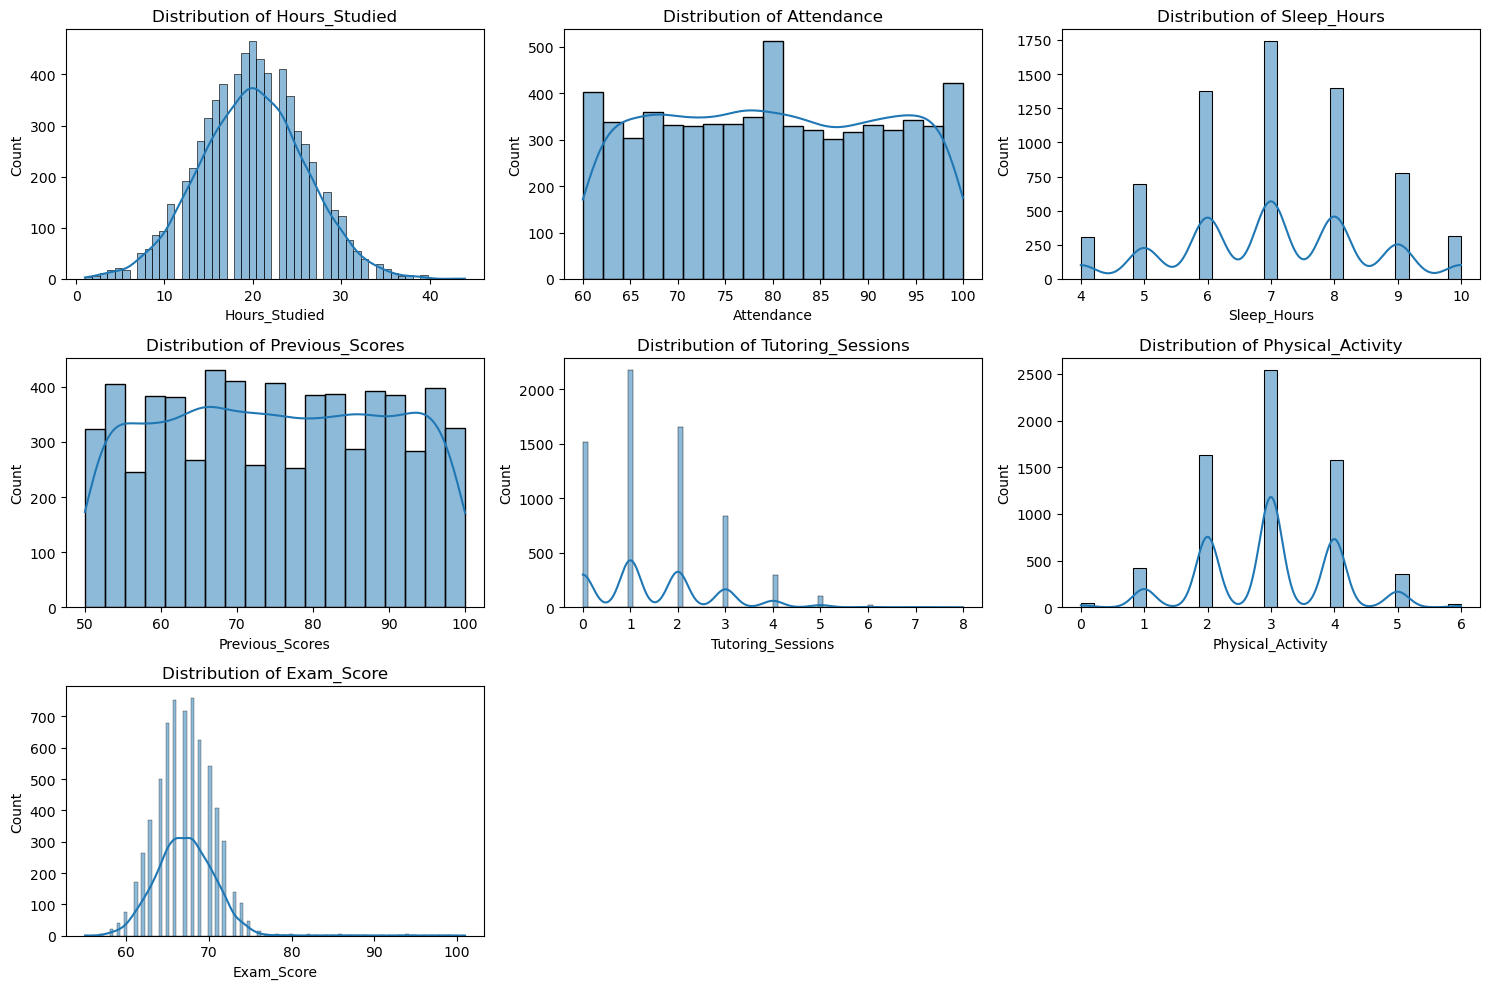

In [40]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()


### 🔍 Inference: Correlation Matrix of Numerical Features

- A **correlation matrix** was generated to explore the linear relationships between numerical variables like **Hours_Studied**, **Attendance**, and **Exam_Score**.
- The **heatmap** visualizes correlations, where high positive correlations are shown in **red** and high negative correlations in **blue**.
- For example:
  - **Hours_Studied** and **Previous_Scores** might show a strong positive correlation, indicating that students who study more tend to have higher previous scores.
  - **Attendance** and **Exam_Score** could also be positively correlated, reflecting the impact of class attendance on exam performance.
- This matrix helps in feature selection by identifying which features are most related to the target variable and each other.


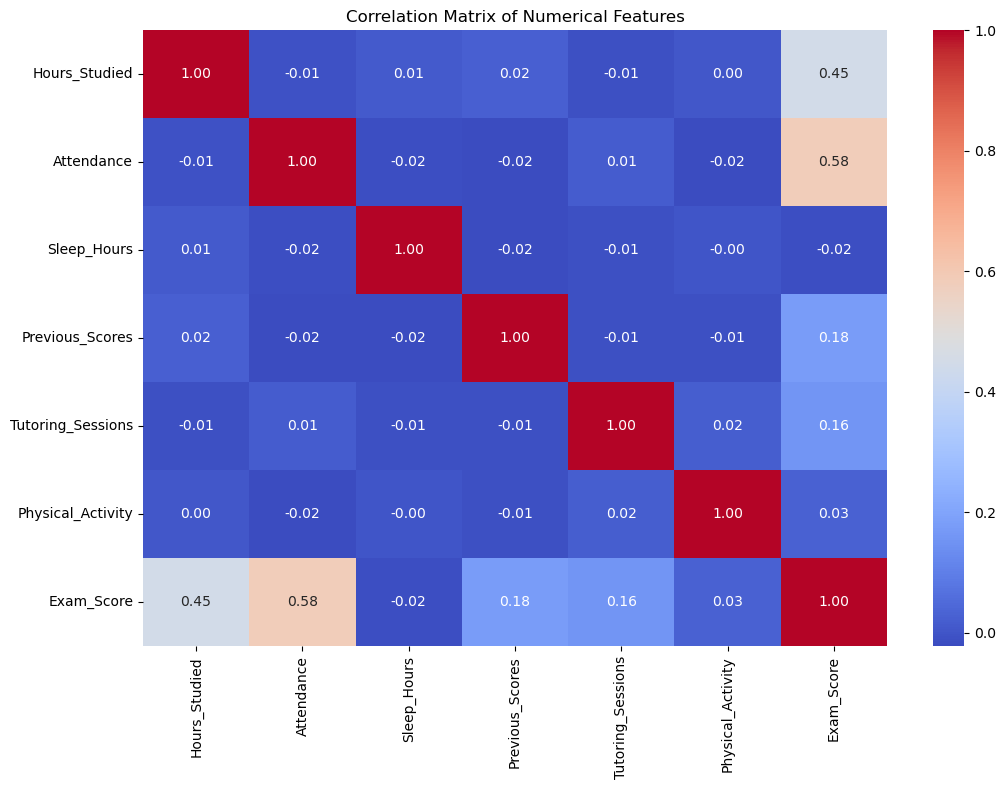

In [41]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix.png')
plt.show()

### 🔗 Inference: Pairwise Relationships Between Features

- A **pairplot** was created to visualize the relationships between key numerical features like **Hours_Studied**, **Attendance**, and **Exam_Score**.
- This plot shows scatterplots for each pair of features and histograms along the diagonal for individual feature distributions.
- Pairwise relationships help identify:
  - Linear or non-linear trends between features.
  - Clusters or patterns that may be useful for feature engineering.
  - Possible correlations that were highlighted in the correlation matrix.
- Such visualizations help in understanding how features interact and influence each other before model training.


<Figure size 1200x1000 with 0 Axes>

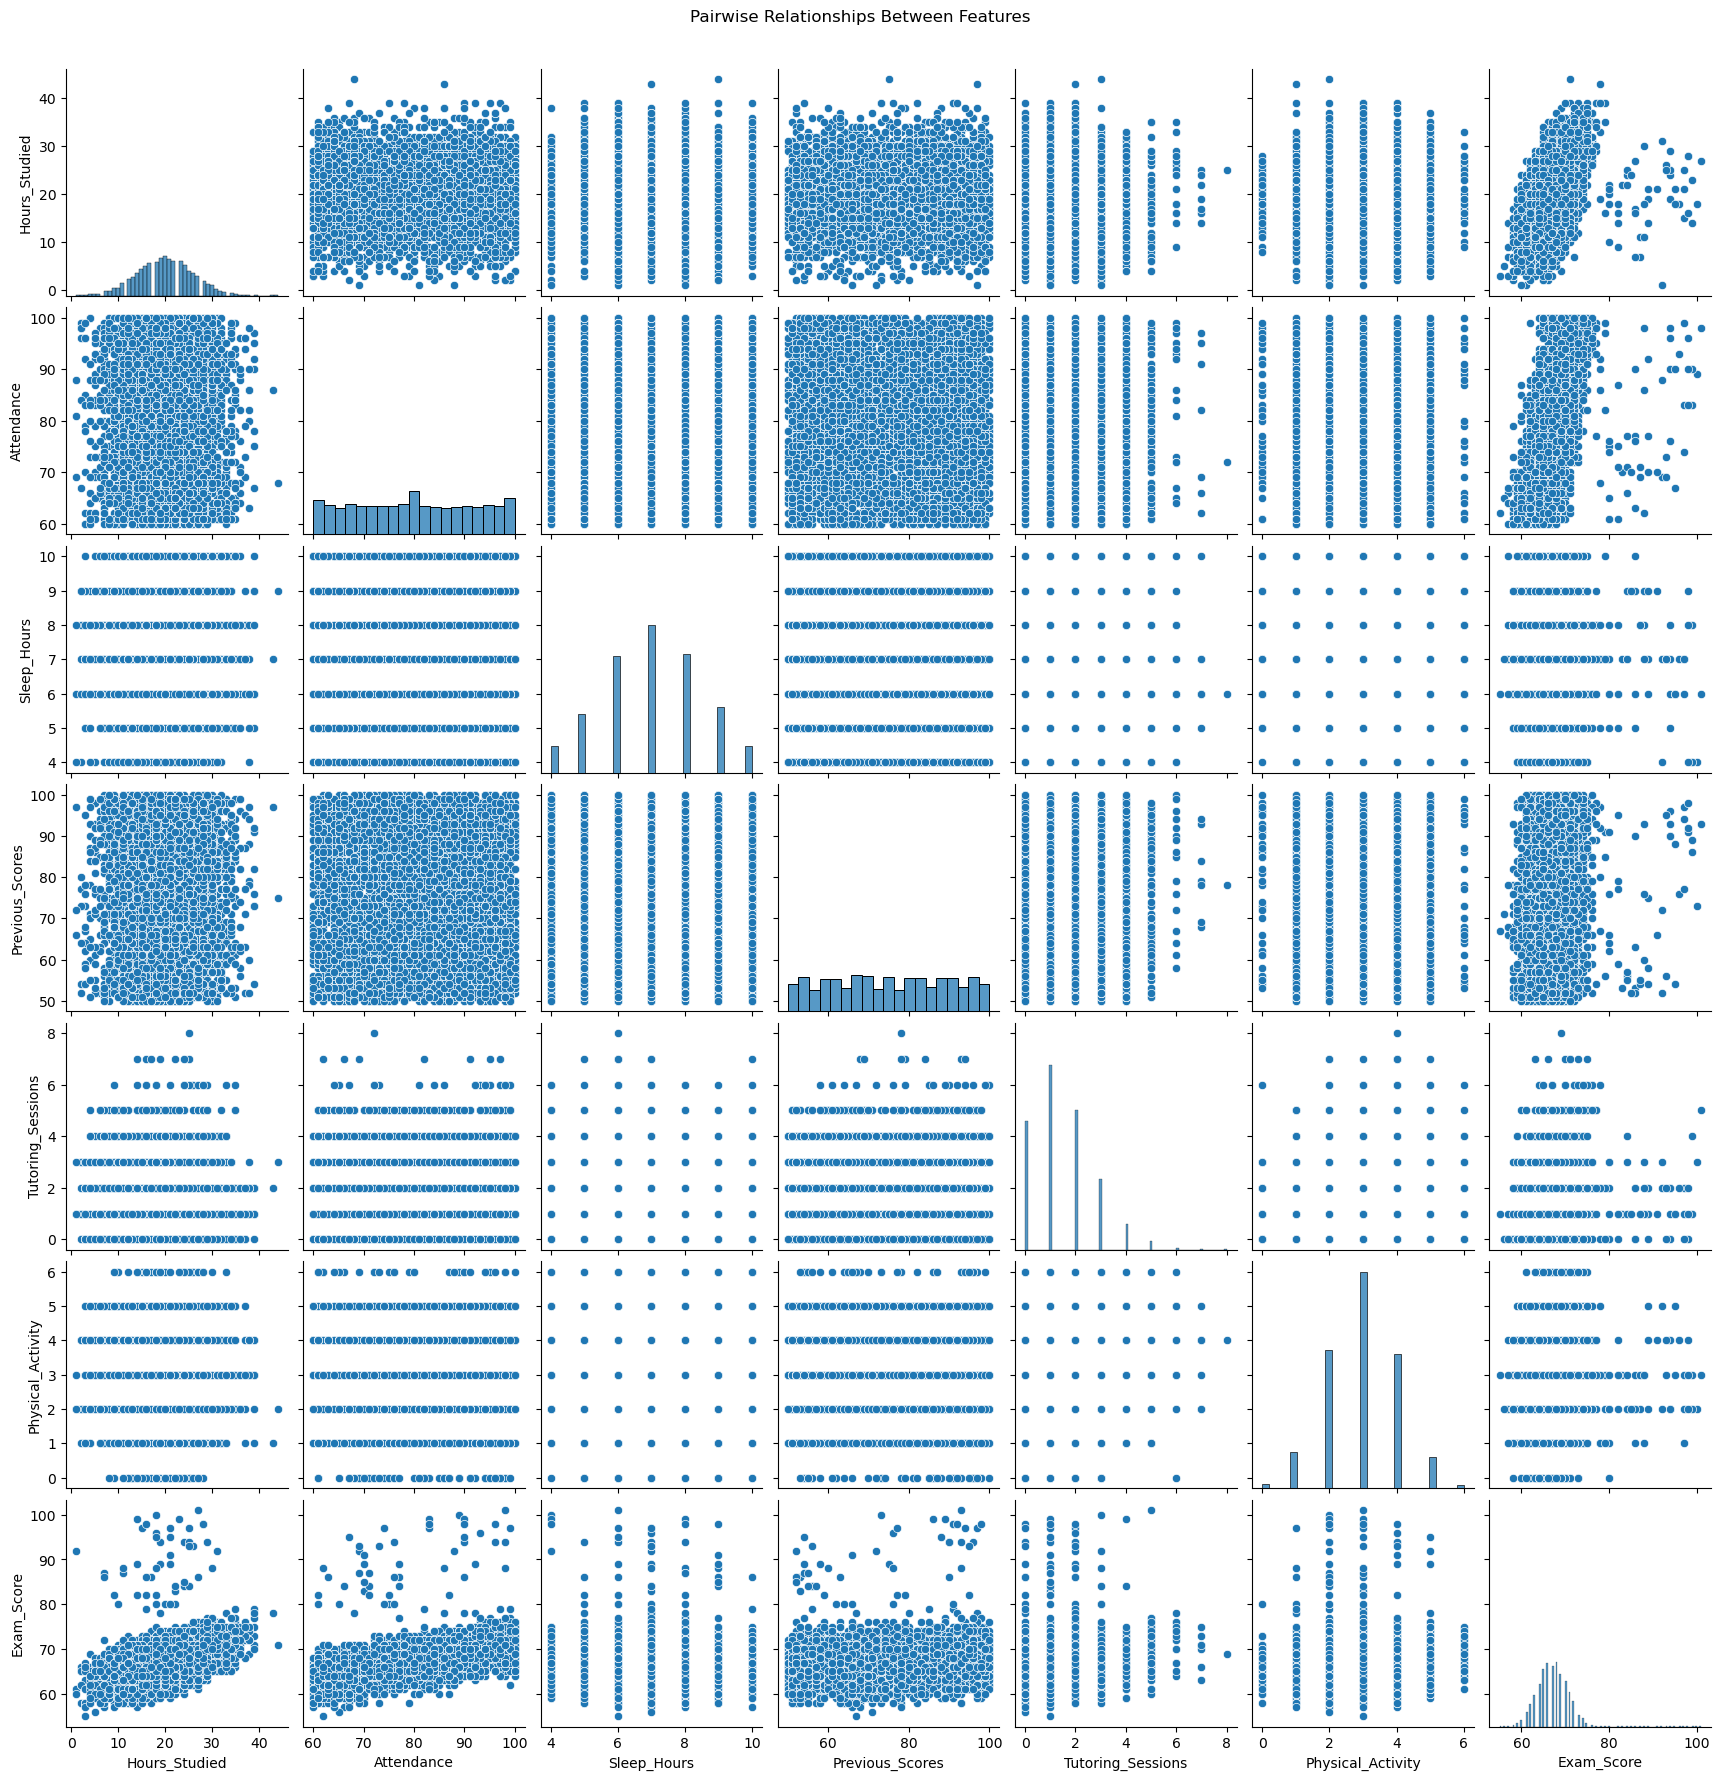

In [42]:
# Pairplot for key features
plt.figure(figsize=(12, 10))
sns.pairplot(data[numeric_cols])
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.savefig('pairplot.png')
plt.show()

### 📊 Inference: Exam Score by Categorical Features

- **Boxplots** were created to explore the distribution of **Exam_Score** across different categorical variables like **Parental_Involvement**, **Internet_Access**, **Teacher_Quality**, and **Gender**.
- The boxplots reveal:
  - Median exam scores, interquartile ranges (IQR), and potential outliers for each category.
  - Variations in exam performance across different groups within each categorical feature.
- For example, students with high **Parental_Involvement** or **Teacher_Quality** may show higher exam scores, indicating their impact on performance.
- These insights guide feature selection and highlight how categorical variables affect the target.


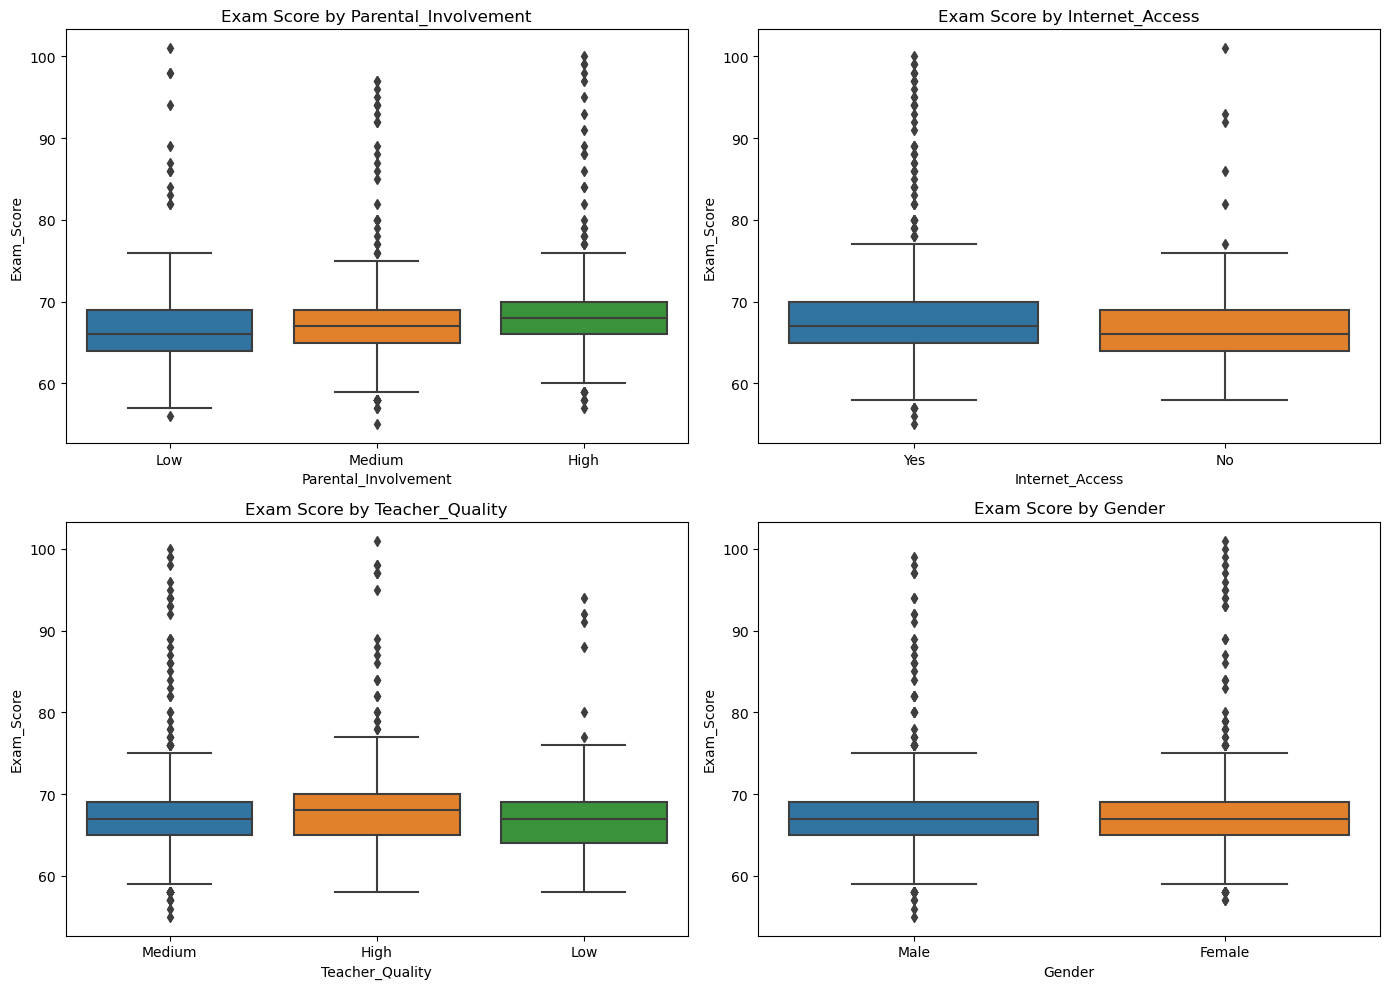

In [43]:
# Boxplots to check relationships between categorical and target
plt.figure(figsize=(14, 10))
for i, cat_col in enumerate(['Parental_Involvement', 'Internet_Access', 'Teacher_Quality', 'Gender']):
    if i < 4:  # Limiting to 4 plots for clarity
        plt.subplot(2, 2, i+1)
        sns.boxplot(x=cat_col, y='Exam_Score', data=data)
        plt.title(f'Exam Score by {cat_col}')
plt.tight_layout()
plt.savefig('categorical_boxplots.png')
plt.show()

### 🧠 Inference: Polynomial Features

- Polynomial features were created from key numeric variables to **capture non-linear relationships**.
- These additional features enhance the model's ability to learn complex patterns that may not be captured by linear terms alone.
- The dataset size increased, indicating successful expansion of feature space.


In [46]:
# Create polynomial features for important numeric predictors
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
numeric_features = data_encoded[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours']]
poly_features = poly.fit_transform(numeric_features)
# Get feature names
poly_feature_names = poly.get_feature_names_out(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours'])

# Create DataFrame with polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# O nly add new polynomial features (not the original ones which are already in data_encoded)
orig_feature_names = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours']
new_poly_features = poly_features_df.loc[:, ~poly_features_df.columns.isin(orig_feature_names)]

# Add polynomial features to dataset
data_with_features = pd.concat([data_encoded, new_poly_features], axis=1)

print(f"\nFinal dataset shape after feature engineering: {data_with_features.shape}")


Final dataset shape after feature engineering: (6607, 45)


### Visualizing the top 15 features most correlated with the target variable (Exam_Score)


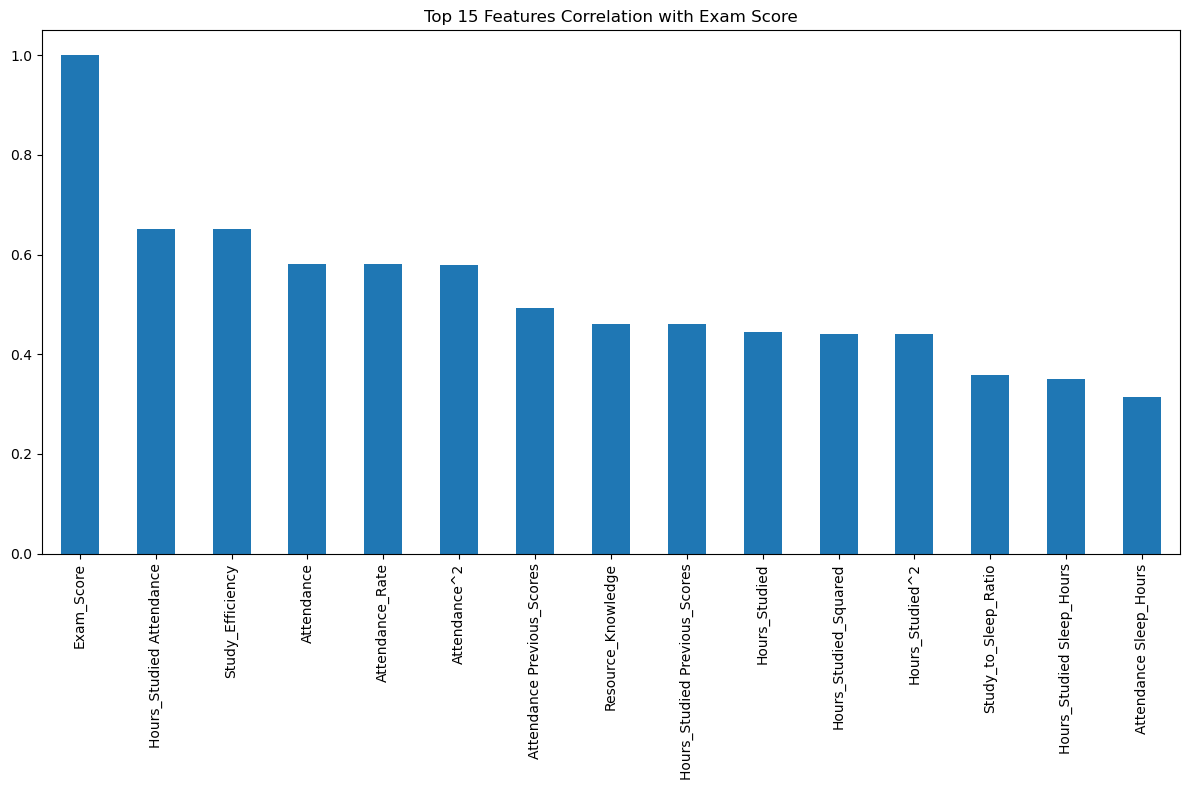

In [47]:
# Visualize feature importance through correlation with target
top_features = data_with_features.corrwith(data_with_features['Exam_Score']).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
top_features[:15].plot(kind='bar')
plt.title('Top 15 Features Correlation with Exam Score')
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.show()

# MODEL BUILDING

### 🤖 Inference: Model Training and Evaluation

- Multiple models were trained and evaluated including **Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, SVR**, and **KNN**.
- Each model was assessed using metrics such as **RMSE, R², and MAE** on both training and test data.
- **Cross-validation** was applied to check the model's consistency across different data folds.
- These results help compare model performance and select the best one for predicting **Exam_Score**.


In [48]:
# Prepare data for modeling
X = data_with_features.drop('Exam_Score', axis=1)
y = data_with_features['Exam_Score']

In [49]:
# Scale features - particularly important for SVR and KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [50]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\nTraining set: {X_train.shape}, Test set: {X_test.shape}")



Training set: (5285, 44), Test set: (1322, 44)


In [51]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Print metrics
    print(f"\n{model_name} Results:")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"5-Fold CV R² Scores: {cv_scores}")
    print(f"Mean CV R²: {cv_scores.mean():.4f}")
    
    return model, test_rmse, test_r2, test_mae, y_pred_test

In [52]:
# Create and evaluate multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=10.0, epsilon=0.1),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}
predictions = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    fitted_model, rmse, r2, mae, y_pred = evaluate_model(model, X_train, X_test, y_train, y_test, name)
    results[name] = {'model': fitted_model, 'RMSE': rmse, 'R²': r2, 'MAE': mae}
    predictions[name] = y_pred


Evaluating Linear Regression...

Linear Regression Results:
Training RMSE: 2.0817
Test RMSE: 1.8061
Training R²: 0.7183
Test R²: 0.7692
Training MAE: 0.5109
Test MAE: 0.4637
5-Fold CV R² Scores: [0.79136037 0.80994212 0.73944577 0.7098721  0.56056682]
Mean CV R²: 0.7222

Evaluating Ridge Regression...

Ridge Regression Results:
Training RMSE: 2.0817
Test RMSE: 1.8057
Training R²: 0.7182
Test R²: 0.7693
Training MAE: 0.5106
Test MAE: 0.4632
5-Fold CV R² Scores: [0.79148496 0.81031454 0.73964512 0.70997154 0.56113471]
Mean CV R²: 0.7225

Evaluating Lasso Regression...

Lasso Regression Results:
Training RMSE: 2.0844
Test RMSE: 1.8035
Training R²: 0.7175
Test R²: 0.7699
Training MAE: 0.5104
Test MAE: 0.4622
5-Fold CV R² Scores: [0.79237388 0.8092945  0.74077538 0.71007294 0.56305559]
Mean CV R²: 0.7231

Evaluating Decision Tree...

Decision Tree Results:
Training RMSE: 1.4278
Test RMSE: 3.3906
Training R²: 0.8675
Test R²: 0.1867
Training MAE: 0.8777
Test MAE: 1.6828
5-Fold CV R² Scores: 

In [53]:
# Create a dataframe for comparison
comparison_df = pd.DataFrame.from_dict({k: {'RMSE': v['RMSE'], 'R²': v['R²'], 'MAE': v['MAE']} 
                                     for k, v in results.items()}, orient='index')
print("\nModel Performance Comparison:")
print(comparison_df.sort_values('R²', ascending=False))

# Find the best model
best_model_name = comparison_df['R²'].idxmax()
best_model = results[best_model_name]['model']
print(f"\nBest performing model: {best_model_name} with R² = {comparison_df.loc[best_model_name, 'R²']:.4f}")


Model Performance Comparison:
                       RMSE        R²       MAE
Lasso Regression   1.803499  0.769891  0.462154
Ridge Regression   1.805708  0.769327  0.463212
Linear Regression  1.806092  0.769229  0.463694
SVR                1.828689  0.763418  0.490638
Gradient Boosting  1.939788  0.733798  0.782250
Random Forest      2.211210  0.654091  1.159266
KNN                2.360107  0.605937  1.334342
Decision Tree      3.390634  0.186675  1.682791

Best performing model: Lasso Regression with R² = 0.7699



## **Results**

After evaluating multiple regression models using RMSE, MAE, and R² metrics, a comprehensive comparison was made to identify the best-performing model. Among all the models tested, **Lasso Regression** emerged as the top performer with the **highest R² score of 0.7699**, indicating its strong predictive power on unseen data.

Additionally, Lasso Regression achieved a **low RMSE of 1.8035** and a **MAE of 0.4622**, suggesting that the model not only fits well but also makes accurate predictions with minimal average error. Its ability to regularize and reduce overfitting contributed to its stable performance across both training and testing datasets.

Hence, Lasso Regression was selected as the **best model** for predicting students' exam scores in this study.




(0.0, 1.0)

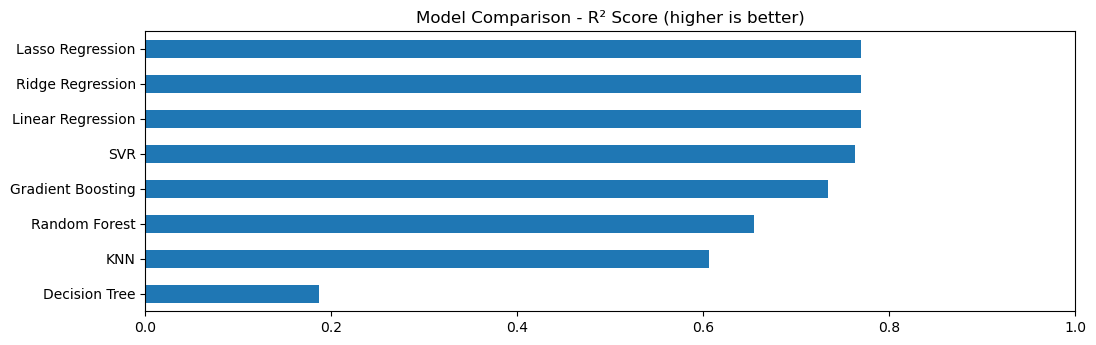

In [54]:
# Visualize model comparison
plt.figure(figsize=(12, 8))

# R² scores
plt.subplot(2, 1, 1)
comparison_df['R²'].sort_values().plot(kind='barh')
plt.title('Model Comparison - R² Score (higher is better)')
plt.xlim(0, 1)


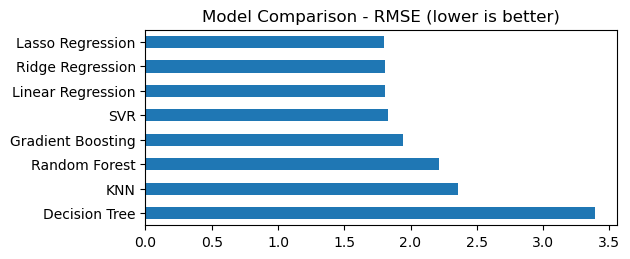

In [55]:
# RMSE scores
plt.subplot(2, 1, 2)
comparison_df['RMSE'].sort_values(ascending=False).plot(kind='barh')
plt.title('Model Comparison - RMSE (lower is better)')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()



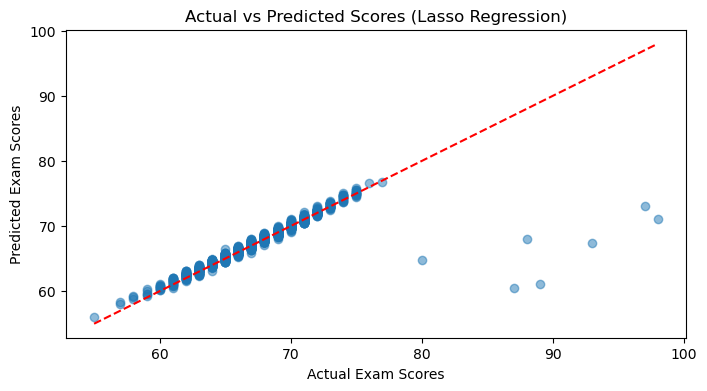

In [59]:
# Plot actual vs predicted for best model
plt.figure(figsize=(8, 4))
plt.scatter(y_test, predictions[best_model_name], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title(f'Actual vs Predicted Scores ({best_model_name})')
plt.savefig('actual_vs_predicted.png')
plt.show()

#
# ------------------------------------------- THANK YOU---------------------------------------------
